In [1]:
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd 

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tflearn.data_utils as du
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
print(tf.__version__)



1.10.1


In [110]:
x_train = pd.read_csv('./data/csvTrainImages 13440x1024.csv', header = None)
y_train = pd.read_csv('./data/csvTrainLabel 13440x1.csv', header = None)
x_test = pd.read_csv('./data/csvTestImages 3360x1024.csv', header = None)
y_test = pd.read_csv('./data/csvTestLabel 3360x1.csv', header = None)

x_train = x_train.iloc[:,:].values.astype('float32')
y_train = y_train.iloc[:,:].values.astype('int32')-1
x_test = x_test.iloc[:,:].values.astype('float32')
y_test = y_test.iloc[:,:].values.astype('int32')-1

# Reshape the data

In [112]:

x_train = x_train.reshape(x_train.shape[0], 32, 32)
x_train = x_train.swapaxes(1, 2)
x_test = x_test.reshape(x_test.shape[0], 32, 32)
x_test = x_test.swapaxes(1, 2)



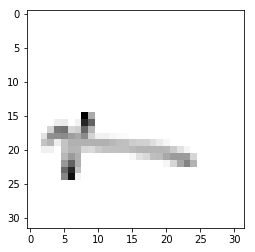

[0]


In [128]:
import matplotlib.pyplot as plt

plt.imshow(x_train[7].squeeze().T,cmap=plt.cm.binary)
plt.show()
print(y_train[7])

## Reshping data for model 1

In [133]:
# run this before fitting model 1


# x_train = x_train.reshape([-1, 32, 32, 1])
# x_test = x_test.reshape([-1, 32, 32, 1])

# x_train, mean1 = du.featurewise_zero_center(x_train)
# x_test, mean2 = du.featurewise_zero_center(x_test)

# y_train = du.to_categorical(y_train,28)
# y_test = du.to_categorical(y_test,28)

# Normalize

In [115]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


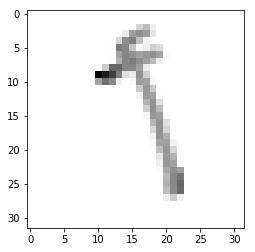

In [116]:
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

# Building  model 1

In [105]:
# recognizer = Sequential()

# recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu', input_shape = (32,32,1)))
# recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu'))
# recognizer.add(MaxPool2D(pool_size=(2,2)))
# recognizer.add(Dropout(0.25))


# recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# recognizer.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# recognizer.add(Dropout(0.25))


# recognizer.add(Flatten())
# recognizer.add(Dense(units = 256, input_dim = 1024, activation = 'relu'))
# recognizer.add(Dense(units = 256, activation = "relu"))
# recognizer.add(Dropout(0.5))
# recognizer.add(Dense(28, activation = "softmax"))

In [102]:
# recognizer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 8, 8, 64)          0         
__________

In [106]:
# optimizer = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0)
# recognizer.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
# datagen = ImageDataGenerator(
#         featurewise_center=False, 
#         samplewise_center=False,  
#         featurewise_std_normalization=False,
#         samplewise_std_normalization=False,
#         zca_whitening=False,
#         rotation_range=10,
#         zoom_range = 0.1,  
#         width_shift_range=0.1, 
#         height_shift_range=0.1,
#         horizontal_flip=False,
#         vertical_flip=False)

## fitting model 1

In [117]:
# datagen.fit(x_train)
# recognizer.fit_generator(datagen.flow(x_train, y_train, batch_size=100),
#                              epochs = 30, verbose = 2, steps_per_epoch=x_train.shape[0] // 100)


----


# Building Model 2

In [124]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(28, activation=tf.nn.softmax))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [130]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 28)                3612      
Total params: 151,324
Trainable params: 151,324
Non-trainable params: 0
_________________________________________________________________


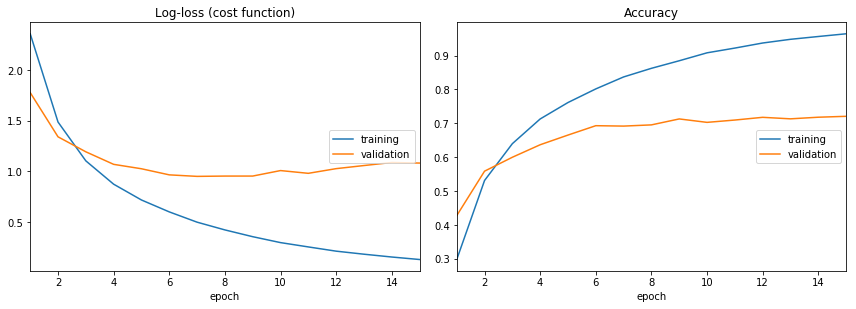

CPU times: user 58 s, sys: 5.64 s, total: 1min 3s
Wall time: 43.5 s


In [126]:
%%time
from livelossplot import PlotLossesKeras
model.fit(x_train, y_train, epochs=15, 
          callbacks=[PlotLossesKeras()],
          verbose=1,
         validation_data=(x_test, y_test))

In [131]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

3360/3360 [==============================] - 0s 70us/step
1.081822417605491
0.7205357142857143
